In [45]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns;
from sklearn.model_selection import train_test_split

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from itertools import cycle



In [46]:
# Import some data to play with
iris = sns.load_dataset('iris')
Y = iris['species'].astype('category').cat.codes # On veut afficher le type de fleur
X = iris.drop('species', axis='columns') # On garde que les dimension de la fleur

In [47]:
# Binarize the output
Y = label_binarize(Y, classes=[0, 1, 2])
n_classes = Y.shape[1]

In [48]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [49]:
splits = train_test_split(X, Y,           # features, target
                         train_size=0.3,  # 50% de X_train et Y_train et 50% de Y_test et Y_test
                         stratify=Y,      # Va prendre une proportion aux hasard de valeurs différentes histoire de ne pas avoir des cas où l'on a que des même valeur
                         random_state=1203)  # Sert à fixer le harsard pour ne pas avoir des résultat différents à chaque tests.

In [50]:
# shuffle and split training and test sets
X_train, X_test, Y_train, Y_test = splits #On associe chaque shape à une variable


In [51]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))

Y_score = classifier.fit(X_train, Y_train).decision_function(X_test)

In [52]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


In [53]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

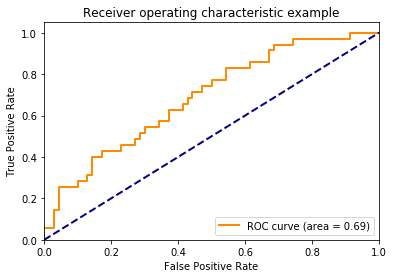

In [54]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()